# Reproducing Lb -> L(1520) form-factors

In [1]:
import eos
import numpy as np
import matplotlib.pyplot as plt

## Define the analysis

### SCET relations

In [2]:
eos.Observables().insert('Lambda_b->Lambda(1520)::f_long12^V_f_perp12^V', R'', eos.Unit.Unity(), eos.Options(),
                         '( 1.0 - <<Lambda_b->Lambda(1520)::f_long12^V(q2)>>[q2=0] / <<Lambda_b->Lambda(1520)::f_perp12^V(q2)>>[q2=0] )')
eos.Observables().insert('Lambda_b->Lambda(1520)::f_perp12^V_f_time12^A', R'', eos.Unit.Unity(), eos.Options(),
                         '( 1.0 - <<Lambda_b->Lambda(1520)::f_perp12^V(q2)>>[q2=0] / <<Lambda_b->Lambda(1520)::f_time12^A(q2)>>[q2=0] )')
eos.Observables().insert('Lambda_b->Lambda(1520)::f_long12^A_f_perp12^A', R'', eos.Unit.Unity(), eos.Options(),
                         '( 1.0 - <<Lambda_b->Lambda(1520)::f_long12^A(q2)>>[q2=0] / <<Lambda_b->Lambda(1520)::f_perp12^A(q2)>>[q2=0] )')
eos.Observables().insert('Lambda_b->Lambda(1520)::f_long12^V_f_long12^T', R'', eos.Unit.Unity(), eos.Options(),
                         '( 1.0 - <<Lambda_b->Lambda(1520)::f_long12^V(q2)>>[q2=0] / <<Lambda_b->Lambda(1520)::f_long12^T(q2)>>[q2=0] )')
eos.Observables().insert('Lambda_b->Lambda(1520)::f_long12^T_f_perp12^T', R'', eos.Unit.Unity(), eos.Options(),
                         '( 1.0 - <<Lambda_b->Lambda(1520)::f_long12^T(q2)>>[q2=0] / <<Lambda_b->Lambda(1520)::f_perp12^T(q2)>>[q2=0] )')

In [3]:
SCET_constraints = {
    "Lambda_b->Lambda(1520)::f_perp32_v@SCET": {
        "type": "Gaussian",
        "observable": "Lambda_b->Lambda(1520)::f_perp32^V(q2)",
        "kinematics": {"q2": 0}, "options": {'form-factors': 'ABR2022'},
        "mean": 0, "sigma-stat": {"hi": 0., "lo": 0.}, "sigma-sys": {"hi": 0.2, "lo": 0.2}
    },
    "Lambda_b->Lambda(1520)::f_perp32_a@SCET": {
        "type": "Gaussian",
        "observable": "Lambda_b->Lambda(1520)::f_perp32^A(q2)",
        "kinematics": {"q2": 0}, "options": {'form-factors': 'ABR2022'},
        "mean": 0, "sigma-stat": {"hi": 0., "lo": 0.}, "sigma-sys": {"hi": 0.2, "lo": 0.2}
    },
    "Lambda_b->Lambda(1520)::f_perp32_t@SCET": {
        "type": "Gaussian",
        "observable": "Lambda_b->Lambda(1520)::f_perp32^T(q2)",
        "kinematics": {"q2": 0}, "options": {'form-factors': 'ABR2022'},
        "mean": 0, "sigma-stat": {"hi": 0., "lo": 0.}, "sigma-sys": {"hi": 0.2, "lo": 0.2}
    },
    "Lambda_b->Lambda(1520)::f_perp32_t5@SCET": {
        "type": "Gaussian",
        "observable": "Lambda_b->Lambda(1520)::f_perp32^T5(q2)",
        "kinematics": {"q2": 0}, "options": {'form-factors': 'ABR2022'},
        "mean": 0, "sigma-stat": {"hi": 0., "lo": 0.}, "sigma-sys": {"hi": 0.2, "lo": 0.2}
    },
    "Lambda_b->Lambda(1520)::f_long12^V_f_perp12^V@SCET": {
        "type": "Gaussian",
        "observable": "Lambda_b->Lambda(1520)::f_long12^V_f_perp12^V",
        "kinematics": {}, "options": {'form-factors': 'ABR2022'},
        "mean": 0, "sigma-stat": {"hi": 0., "lo": 0.}, "sigma-sys": {"hi": 0.2, "lo": 0.2}
    },
    "Lambda_b->Lambda(1520)::f_long12^V_f_long12^T@SCET": {
        "type": "Gaussian",
        "observable": "Lambda_b->Lambda(1520)::f_long12^V_f_long12^T",
        "kinematics": {}, "options": {'form-factors': 'ABR2022'},
        "mean": 0, "sigma-stat": {"hi": 0., "lo": 0.}, "sigma-sys": {"hi": 0.2, "lo": 0.2}
    },
    "Lambda_b->Lambda(1520)::f_perp12^V_f_time12^A@SCET": {
        "type": "Gaussian",
        "observable": "Lambda_b->Lambda(1520)::f_perp12^V_f_time12^A",
        "kinematics": {}, "options": {'form-factors': 'ABR2022'},
        "mean": 0, "sigma-stat": {"hi": 0., "lo": 0.}, "sigma-sys": {"hi": 0.2, "lo": 0.2}
    },
    "Lambda_b->Lambda(1520)::f_long12^A_f_perp12^A@SCET": {
        "type": "Gaussian",
        "observable": "Lambda_b->Lambda(1520)::f_long12^A_f_perp12^A",
        "kinematics": {}, "options": {'form-factors': 'ABR2022'},
        "mean": 0, "sigma-stat": {"hi": 0., "lo": 0.}, "sigma-sys": {"hi": 0.2, "lo": 0.2}
    },
    "Lambda_b->Lambda(1520)::f_long12^T_f_perp12^T@SCET": {
        "type": "Gaussian",
        "observable": "Lambda_b->Lambda(1520)::f_long12^T_f_perp12^T",
        "kinematics": {}, "options": {'form-factors': 'ABR2022'},
        "mean": 0, "sigma-stat": {"hi": 0., "lo": 0.}, "sigma-sys": {"hi": 0.2, "lo": 0.2}
    },
}

### Priors for N = 2

In [4]:
# Prior ranges are [-1, 1] due to the dispersive bounds
priors = [
    { 'parameter': 'Lambda_b->Lambda(1520)::a^(t12,V)_1@ABR2022',     'min': -1.0, 'max':  1.0, 'type': 'uniform'},
    { 'parameter': 'Lambda_b->Lambda(1520)::a^(t12,V)_2@ABR2022',     'min': -1.0, 'max':  1.0, 'type': 'uniform'},
    { 'parameter': 'Lambda_b->Lambda(1520)::a^(012,V)_1@ABR2022',     'min': -1.0, 'max':  1.0, 'type': 'uniform'},
    { 'parameter': 'Lambda_b->Lambda(1520)::a^(012,V)_2@ABR2022',     'min': -1.0, 'max':  1.0, 'type': 'uniform'},
    { 'parameter': 'Lambda_b->Lambda(1520)::a^(perp12,V)_1@ABR2022',  'min': -1.0, 'max':  1.0, 'type': 'uniform'},
    { 'parameter': 'Lambda_b->Lambda(1520)::a^(perp12,V)_2@ABR2022',  'min': -1.0, 'max':  1.0, 'type': 'uniform'},
    { 'parameter': 'Lambda_b->Lambda(1520)::a^(perp32,V)_0@ABR2022',  'min': -1.0, 'max':  1.0, 'type': 'uniform'},
    { 'parameter': 'Lambda_b->Lambda(1520)::a^(perp32,V)_1@ABR2022',  'min': -1.0, 'max':  1.0, 'type': 'uniform'},
    { 'parameter': 'Lambda_b->Lambda(1520)::a^(perp32,V)_2@ABR2022',  'min': -1.0, 'max':  1.0, 'type': 'uniform'},
    { 'parameter': 'Lambda_b->Lambda(1520)::a^(t12,A)_1@ABR2022',     'min': -1.0, 'max':  1.0, 'type': 'uniform'},
    { 'parameter': 'Lambda_b->Lambda(1520)::a^(t12,A)_2@ABR2022',     'min': -1.0, 'max':  1.0, 'type': 'uniform'},
    { 'parameter': 'Lambda_b->Lambda(1520)::a^(012,A)_1@ABR2022',     'min': -1.0, 'max':  1.0, 'type': 'uniform'},
    { 'parameter': 'Lambda_b->Lambda(1520)::a^(012,A)_2@ABR2022',     'min': -1.0, 'max':  1.0, 'type': 'uniform'},
    { 'parameter': 'Lambda_b->Lambda(1520)::a^(perp12,A)_1@ABR2022',  'min': -1.0, 'max':  1.0, 'type': 'uniform'},
    { 'parameter': 'Lambda_b->Lambda(1520)::a^(perp12,A)_2@ABR2022',  'min': -1.0, 'max':  1.0, 'type': 'uniform'},
    { 'parameter': 'Lambda_b->Lambda(1520)::a^(perp32,A)_0@ABR2022',  'min': -1.0, 'max':  1.0, 'type': 'uniform'},
    { 'parameter': 'Lambda_b->Lambda(1520)::a^(perp32,A)_1@ABR2022',  'min': -1.0, 'max':  1.0, 'type': 'uniform'},
    { 'parameter': 'Lambda_b->Lambda(1520)::a^(perp32,A)_2@ABR2022',  'min': -1.0, 'max':  1.0, 'type': 'uniform'},
    { 'parameter': 'Lambda_b->Lambda(1520)::a^(012,T)_1@ABR2022',     'min': -1.0, 'max':  1.0, 'type': 'uniform'},
    { 'parameter': 'Lambda_b->Lambda(1520)::a^(012,T)_2@ABR2022',     'min': -1.0, 'max':  1.0, 'type': 'uniform'},
    { 'parameter': 'Lambda_b->Lambda(1520)::a^(perp12,T)_1@ABR2022',  'min': -1.0, 'max':  1.0, 'type': 'uniform'},
    { 'parameter': 'Lambda_b->Lambda(1520)::a^(perp12,T)_2@ABR2022',  'min': -1.0, 'max':  1.0, 'type': 'uniform'},
    { 'parameter': 'Lambda_b->Lambda(1520)::a^(perp32,T)_0@ABR2022',  'min': -1.0, 'max':  1.0, 'type': 'uniform'},
    { 'parameter': 'Lambda_b->Lambda(1520)::a^(perp32,T)_1@ABR2022',  'min': -1.0, 'max':  1.0, 'type': 'uniform'},
    { 'parameter': 'Lambda_b->Lambda(1520)::a^(perp32,T)_2@ABR2022',  'min': -1.0, 'max':  1.0, 'type': 'uniform'},
    { 'parameter': 'Lambda_b->Lambda(1520)::a^(012,T5)_1@ABR2022',    'min': -1.0, 'max':  1.0, 'type': 'uniform'},
    { 'parameter': 'Lambda_b->Lambda(1520)::a^(012,T5)_2@ABR2022',    'min': -1.0, 'max':  1.0, 'type': 'uniform'},
    { 'parameter': 'Lambda_b->Lambda(1520)::a^(perp12,T5)_1@ABR2022', 'min': -1.0, 'max':  1.0, 'type': 'uniform'},
    { 'parameter': 'Lambda_b->Lambda(1520)::a^(perp12,T5)_2@ABR2022', 'min': -1.0, 'max':  1.0, 'type': 'uniform'},
    { 'parameter': 'Lambda_b->Lambda(1520)::a^(perp32,T5)_1@ABR2022', 'min': -1.0, 'max':  1.0, 'type': 'uniform'},
    { 'parameter': 'Lambda_b->Lambda(1520)::a^(perp32,T5)_2@ABR2022', 'min': -1.0, 'max':  1.0, 'type': 'uniform'},
]

### Constraints

In [5]:
likelihood = [
    # LQCD inputs 2107.13140
    'Lambda_b->Lambda(1520)::FormFactors[f,g,h,htilde]@MR:2021A',
    # Dispersive bounds that include 1-particle contributions and an overall 10% uncertainty
    'Lambda_b->Lambda(1520)::Bound[0^+_V]',
    'Lambda_b->Lambda(1520)::Bound[1^-_V]',
    'Lambda_b->Lambda(1520)::Bound[0^-_A]',
    'Lambda_b->Lambda(1520)::Bound[1^+_A]',
    'Lambda_b->Lambda(1520)::Bound[1^-_T]',
    'Lambda_b->Lambda(1520)::Bound[1^+_T5]',
]

### Analysis definition & best fit point

In [6]:
analysis_args = {
    'fixed_parameters': {},
    'global_options': {},
    'manual_constraints': SCET_constraints,
    'priors': priors,
    'likelihood': likelihood
}
analysis = eos.Analysis(**analysis_args)

INFO:EOS:Creating analysis with 31 priors, 7 EOS-wide constraints, 0 global options, 9 manually-entered constraints and 0 fixed parameters.
INFO:EOS:likelihood probably depends on 44 parameter(s) that do not appear in the prior; check prior?


In [7]:
# we start the optimization near the known best-fit point
start_point = [
        0.21275235,  0.77188506, -0.24388359, -0.21551997, -0.67611246,
       -0.60334313, -0.01234777,  0.00089741,  0.0133156 , -0.68280337,
       -0.63071008,  0.46357859,  0.54496845, -0.07186785,  0.43202465,
        0.0457824 , -0.07038413, -0.09773456, -0.51432421, -0.4616694 ,
       -0.42280694, -0.37409586,  0.00318391,  0.02555344,  0.01513556,
        0.20420751, -0.31693437,  0.07201444,  0.36185485,  0.10525962,
        0.13056823
    ]

In [8]:
%%time
bfp = analysis.optimize(
    start_point = start_point,
)
display(bfp.point)
bfp_gof = analysis.goodness_of_fit()
print("The fit is underconstrained, no p-value can be provided.")
display(bfp_gof)

array([ 0.21278836,  0.77188243, -0.24392565, -0.21555878, -0.67611311,
       -0.6033491 , -0.01246454, -0.00471225,  0.00933763, -0.68278735,
       -0.6307036 ,  0.46345065,  0.54486204, -0.07178367,  0.43206497,
        0.04595643, -0.07092039, -0.09828144, -0.51451618, -0.461839  ,
       -0.42269436, -0.37401034,  0.00314142,  0.0235486 ,  0.01371446,
        0.20386136, -0.316417  ,  0.07201042,  0.36181587,  0.10993083,
        0.13336755])

The fit is underconstrained, no p-value can be provided.


CPU times: user 1.11 s, sys: 1.84 s, total: 2.95 s
Wall time: 975 ms


## Generating posterior-predictive samples using MCMC's

In [9]:
# we run 5 MCMC
mcmc_chains = 5

In [10]:
%%time
for i in range(0, mcmc_chains):
    print(f"MC Markov Chain #{i}")
    
    # Set random seed for reproducibility
    rng = np.random.mtrand.RandomState(14408 + i)

    # Run i^th MCMCs, the number of chains, and the number of pre-runs can be increased for publication plots/numbers
    samples, weights = analysis.sample(preruns = 10,
                                       pre_N = 5000,
                                       N = 10000,
                                       stride = 5,
                                       start_point = start_point,
                                       cov_scale=1e-8,
                                       rng=rng)

    # Write MCMC on disk
    eos.data.MarkovChain.create(f"samples_mcmc_{i}", analysis.varied_parameters, samples, weights)

MC Markov Chain #0


Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]

INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is  20%
INFO:EOS:Prerun 1 out of 10
INFO:EOS:Prerun 1: acceptance rate is  63%
INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is  46%
INFO:EOS:Prerun 3 out of 10
INFO:EOS:Prerun 3: acceptance rate is  31%
INFO:EOS:Prerun 4 out of 10
INFO:EOS:Prerun 4: acceptance rate is  25%
INFO:EOS:Prerun 5 out of 10
INFO:EOS:Prerun 5: acceptance rate is  22%
INFO:EOS:Prerun 6 out of 10
INFO:EOS:Prerun 6: acceptance rate is  16%
INFO:EOS:Prerun 7 out of 10
INFO:EOS:Prerun 7: acceptance rate is  18%
INFO:EOS:Prerun 8 out of 10
INFO:EOS:Prerun 8: acceptance rate is  10%
INFO:EOS:Prerun 9 out of 10
INFO:EOS:Prerun 9: acceptance rate is  18%
INFO:EOS:Main run: started ...


Main run:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:EOS:Main run: acceptance rate is  19%


MC Markov Chain #1


Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]

INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is  19%
INFO:EOS:Prerun 1 out of 10
INFO:EOS:Prerun 1: acceptance rate is  64%
INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is  50%
INFO:EOS:Prerun 3 out of 10
INFO:EOS:Prerun 3: acceptance rate is  33%
INFO:EOS:Prerun 4 out of 10
INFO:EOS:Prerun 4: acceptance rate is  28%
INFO:EOS:Prerun 5 out of 10
INFO:EOS:Prerun 5: acceptance rate is  20%
INFO:EOS:Prerun 6 out of 10
INFO:EOS:Prerun 6: acceptance rate is  17%
INFO:EOS:Prerun 7 out of 10
INFO:EOS:Prerun 7: acceptance rate is  17%
INFO:EOS:Prerun 8 out of 10
INFO:EOS:Prerun 8: acceptance rate is  13%
INFO:EOS:Prerun 9 out of 10
INFO:EOS:Prerun 9: acceptance rate is  21%
INFO:EOS:Main run: started ...


Main run:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:EOS:Main run: acceptance rate is  18%


MC Markov Chain #2


Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]

INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is  21%
INFO:EOS:Prerun 1 out of 10
INFO:EOS:Prerun 1: acceptance rate is  64%
INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is  48%
INFO:EOS:Prerun 3 out of 10
INFO:EOS:Prerun 3: acceptance rate is  31%
INFO:EOS:Prerun 4 out of 10
INFO:EOS:Prerun 4: acceptance rate is  27%
INFO:EOS:Prerun 5 out of 10
INFO:EOS:Prerun 5: acceptance rate is  22%
INFO:EOS:Prerun 6 out of 10
INFO:EOS:Prerun 6: acceptance rate is  21%
INFO:EOS:Prerun 7 out of 10
INFO:EOS:Prerun 7: acceptance rate is  15%
INFO:EOS:Prerun 8 out of 10
INFO:EOS:Prerun 8: acceptance rate is  12%
INFO:EOS:Prerun 9 out of 10
INFO:EOS:Prerun 9: acceptance rate is  17%
INFO:EOS:Main run: started ...


Main run:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:EOS:Main run: acceptance rate is  15%


MC Markov Chain #3


Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]

INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is  20%
INFO:EOS:Prerun 1 out of 10
INFO:EOS:Prerun 1: acceptance rate is  69%
INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is  50%
INFO:EOS:Prerun 3 out of 10
INFO:EOS:Prerun 3: acceptance rate is  31%
INFO:EOS:Prerun 4 out of 10
INFO:EOS:Prerun 4: acceptance rate is  28%
INFO:EOS:Prerun 5 out of 10
INFO:EOS:Prerun 5: acceptance rate is  23%
INFO:EOS:Prerun 6 out of 10
INFO:EOS:Prerun 6: acceptance rate is  19%
INFO:EOS:Prerun 7 out of 10
INFO:EOS:Prerun 7: acceptance rate is  16%
INFO:EOS:Prerun 8 out of 10
INFO:EOS:Prerun 8: acceptance rate is  11%
INFO:EOS:Prerun 9 out of 10
INFO:EOS:Prerun 9: acceptance rate is  17%
INFO:EOS:Main run: started ...


Main run:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:EOS:Main run: acceptance rate is  17%


MC Markov Chain #4


Pre-runs:   0%|          | 0/10 [00:00<?, ?it/s]

INFO:EOS:Prerun 0 out of 10
INFO:EOS:Prerun 0: acceptance rate is  20%
INFO:EOS:Prerun 1 out of 10
INFO:EOS:Prerun 1: acceptance rate is  67%
INFO:EOS:Prerun 2 out of 10
INFO:EOS:Prerun 2: acceptance rate is  47%
INFO:EOS:Prerun 3 out of 10
INFO:EOS:Prerun 3: acceptance rate is  33%
INFO:EOS:Prerun 4 out of 10
INFO:EOS:Prerun 4: acceptance rate is  27%
INFO:EOS:Prerun 5 out of 10
INFO:EOS:Prerun 5: acceptance rate is  23%
INFO:EOS:Prerun 6 out of 10
INFO:EOS:Prerun 6: acceptance rate is  20%
INFO:EOS:Prerun 7 out of 10
INFO:EOS:Prerun 7: acceptance rate is  17%
INFO:EOS:Prerun 8 out of 10
INFO:EOS:Prerun 8: acceptance rate is  14%
INFO:EOS:Prerun 9 out of 10
INFO:EOS:Prerun 9: acceptance rate is  18%
INFO:EOS:Main run: started ...


Main run:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:EOS:Main run: acceptance rate is  17%


CPU times: user 3min 54s, sys: 7min 43s, total: 11min 37s
Wall time: 4min 6s


In [11]:
mcmc_paths = [f'samples_mcmc_{i}' for i in range(mcmc_chains)]

chains          = [eos.data.MarkovChain(path).samples for path in mcmc_paths]
chains_weights  = [eos.data.MarkovChain(path).weights for path in mcmc_paths]

samples = np.concatenate(chains, axis=0)
weights = np.concatenate(chains_weights, axis=0)

print(f'Found {len(chains)} chains for a total of {len(samples)} samples.')

Found 5 chains for a total of 50000 samples.


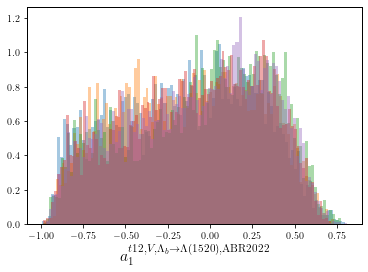

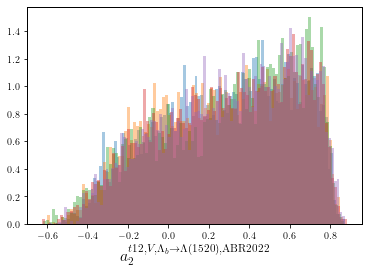

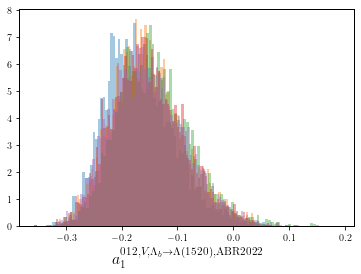

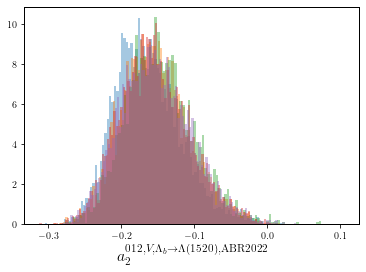

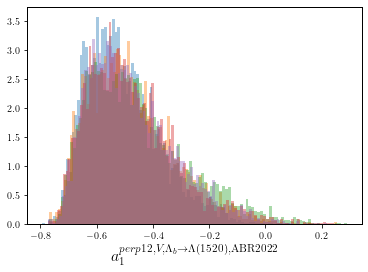

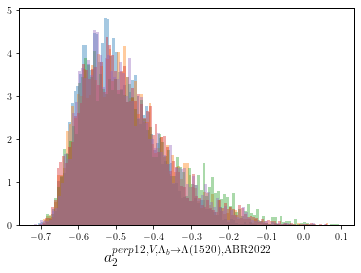

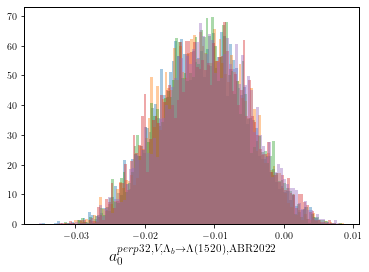

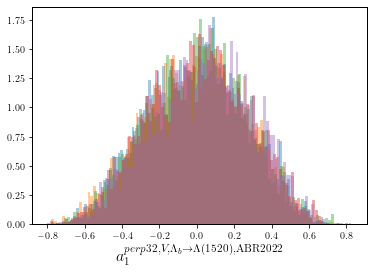

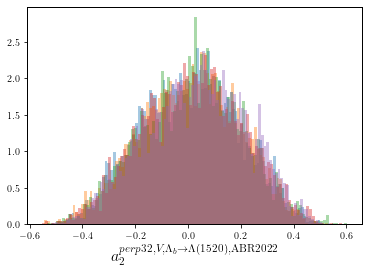

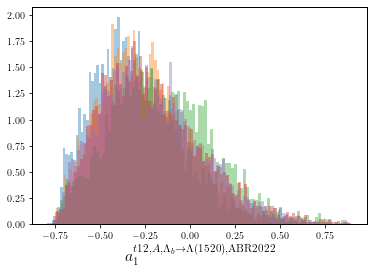

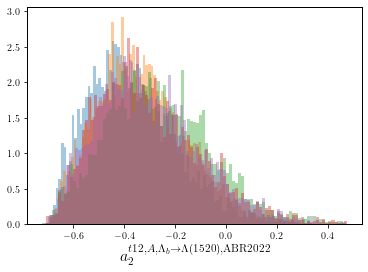

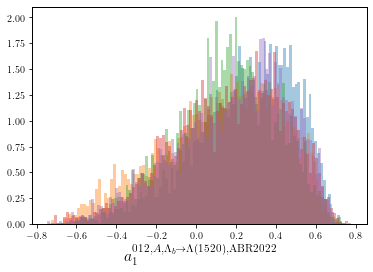

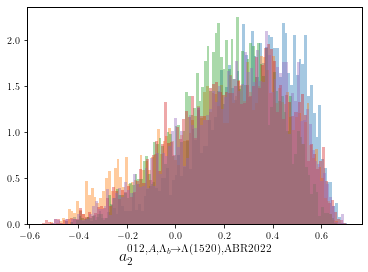

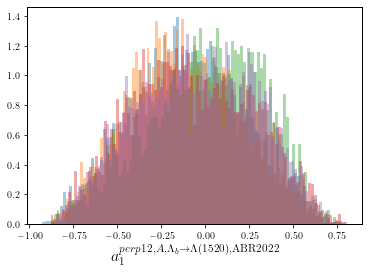

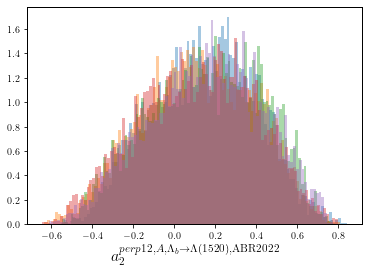

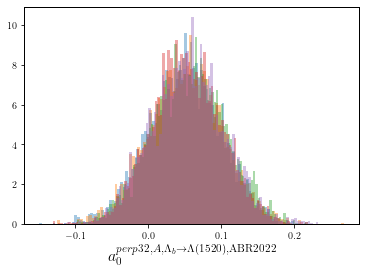

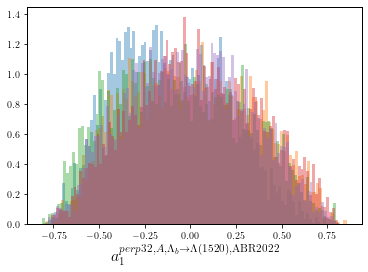

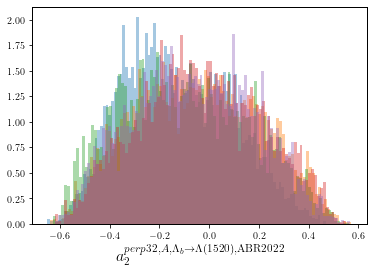

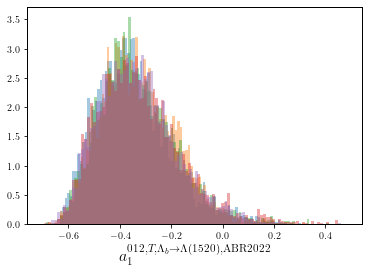

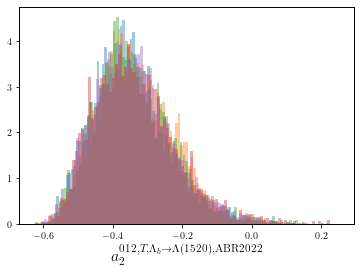

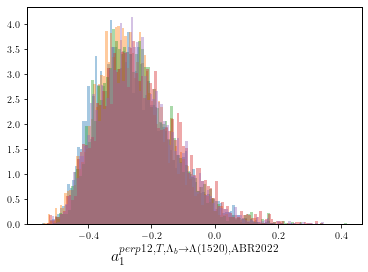

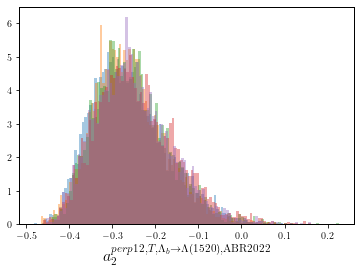

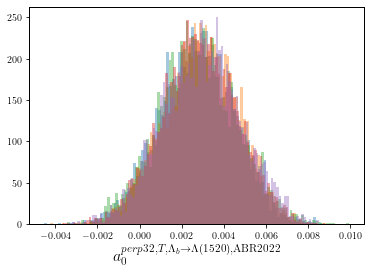

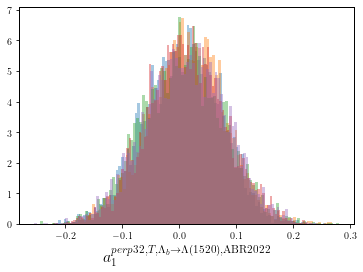

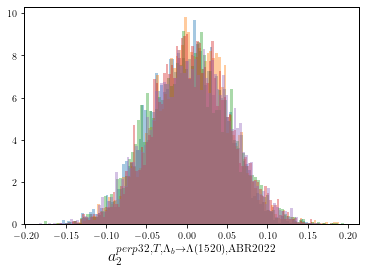

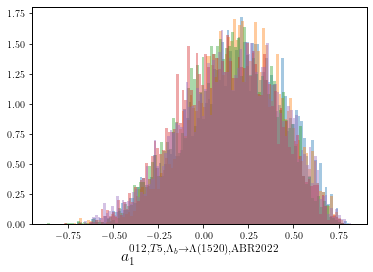

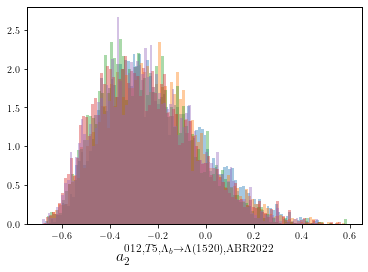

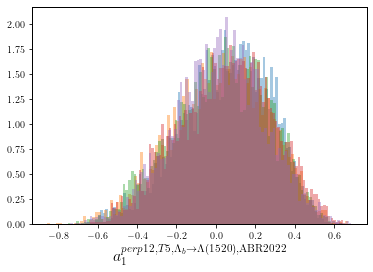

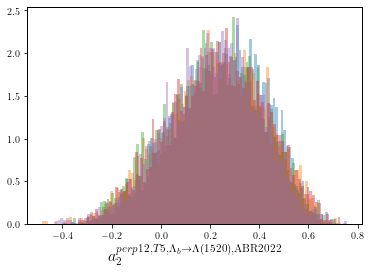

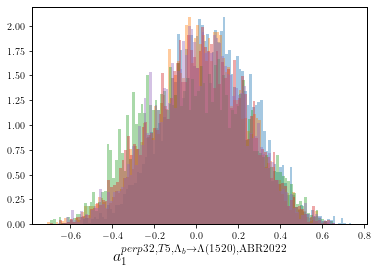

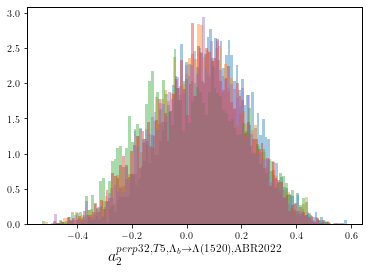

In [12]:
# The posterior distributions of the 5 chains are verlapping nicely, ensuring convergence of the process
for a in range(len(priors)):
    plt.clf()
    for i in range(mcmc_chains):
        myplt = plt.hist(chains[i][:][:,a], bins=100, density=True, alpha=0.4)
    plt.xlabel(analysis.varied_parameters[a].latex())    
    plt.show()

## Plots the form factors

In [13]:
# Compute the form factors for 20 point equidistant on the entire q^2 range
q2values  = np.linspace(0, 16.81, 20)

obs_names = [
    "Lambda_b->Lambda(1520)::f_time12^V(q2)", "Lambda_b->Lambda(1520)::f_long12^V(q2)",
    "Lambda_b->Lambda(1520)::f_perp12^V(q2)", "Lambda_b->Lambda(1520)::f_perp32^V(q2)",
    "Lambda_b->Lambda(1520)::f_time12^A(q2)", "Lambda_b->Lambda(1520)::f_long12^A(q2)",
    "Lambda_b->Lambda(1520)::f_perp12^A(q2)", "Lambda_b->Lambda(1520)::f_perp32^A(q2)",
    "Lambda_b->Lambda(1520)::f_long12^T(q2)",
    "Lambda_b->Lambda(1520)::f_perp12^T(q2)", "Lambda_b->Lambda(1520)::f_perp32^T(q2)",
    "Lambda_b->Lambda(1520)::f_long12^T5(q2)",
    "Lambda_b->Lambda(1520)::f_perp12^T5(q2)", "Lambda_b->Lambda(1520)::f_perp32^T5(q2)",
]

observables = [
    eos.Observable.make(
        obs,
        analysis.parameters,
        eos.Kinematics(q2=q2),
        eos.Options(**{'form-factors': 'ABR2022'})
    ) for q2 in q2values for obs in obs_names
]

In [14]:
def compute_obs(sample):
    for p, v in zip(analysis.varied_parameters, sample):
        p.set(v)
    return [eos.Observable.evaluate(o) for o in observables]

observable_samples = np.array(list(map(compute_obs, samples)))

In [15]:
def plotFF(FFtex, obs_num, name):
    """
    Plotting routine:
    - FFtex:string, latex representation of the plotted form factor
    - obs_num:int, row of the table of observables corresponding to the plotted form factor
    - name:string, name of the file where the plot will exported
    """
    yrange = [ np.amin(observable_samples[:,obs_num::len(obs_names)]), np.amax(observable_samples[:,obs_num::len(obs_names)]) ]
    plot_args = {
    'plot': {
        'x': { 'label': r'$q^2$', 'unit': r'$\textnormal{GeV}^2$',  'range': [0, 16.81] },
        'y': { 'label': FFtex, 'range': yrange },
        'legend': { 'location': 'upper left' },
        'size': (11, 11)
    },
    'contents': [
        {
            'label': r'ABR 2022, N=2',
            'type': 'uncertainty',
            'color': 'darkorange',
            'range': [0, 16.81],
            'data': { 'samples': observable_samples[:,obs_num::len(obs_names)],
                      'weights': weights, 'xvalues': q2values }
        },
        {
            'label': r'MR 2019',
            'type': 'constraint',
            'color': 'k',
            'constraints': 'Lambda_b->Lambda(1520)::FormFactors[f,g,h,htilde]@MR:2021A',
            'observable': obs_names[obs_num],
            'variable': 'q2',
            'rescale-by-width': False
        },
    ]}
    eos.plot.Plotter(plot_args, name).plot()

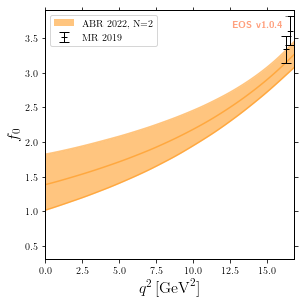

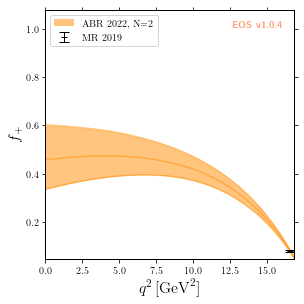

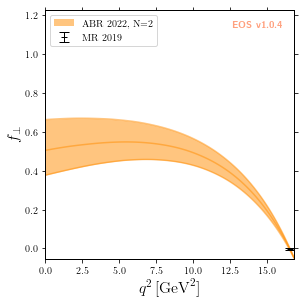

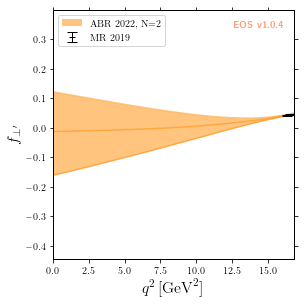

In [16]:
plotFF(r'$f_0$', 0, "f_0.pdf")
plotFF(r'$f_+$', 1, "f_plus.pdf")
plotFF(r'$f_\perp$', 2, "f_perp.pdf")
plotFF(r'$f_{\perp^\prime}$', 3, "f_perpP.pdf")

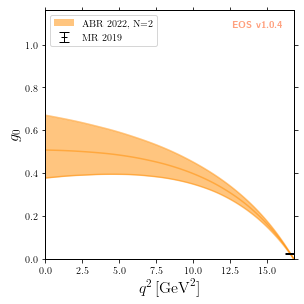

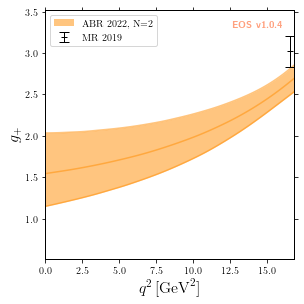

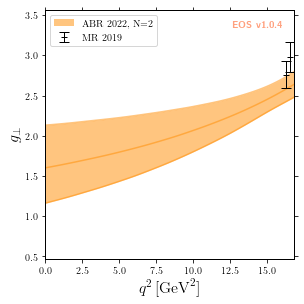

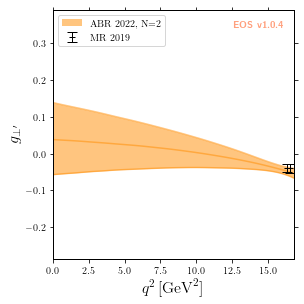

In [17]:
plotFF(r'$g_0$', 4, "g_0.pdf")
plotFF(r'$g_+$', 5, "g_plus.pdf")
plotFF(r'$g_\perp$', 6, "g_perp.pdf")
plotFF(r'$g_{\perp^\prime}$', 7, "g_perpP.pdf")

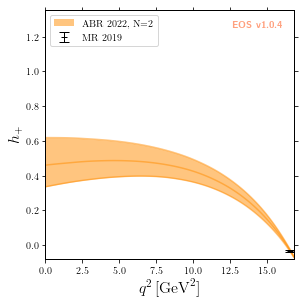

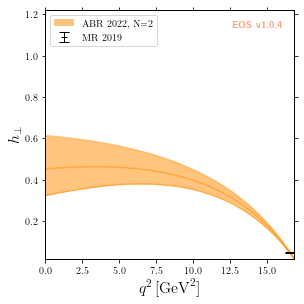

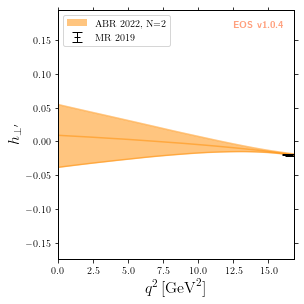

In [18]:
plotFF(r'$h_+$', 8, "h_plus.pdf")
plotFF(r'$h_\perp$', 9, "h_perp.pdf")
plotFF(r'$h_{\perp^\prime}$', 10, "h_perpP.pdf")

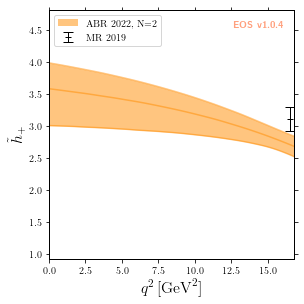

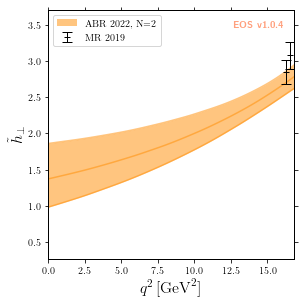

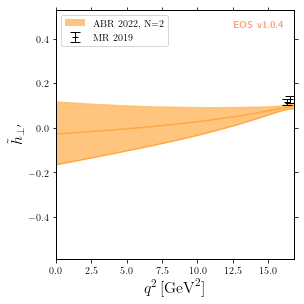

In [19]:
plotFF(r'$\tilde{h}_+$', 11, "ht_plus.pdf")
plotFF(r'$\tilde{h}_\perp$', 12, "ht_perp.pdf")
plotFF(r'$\tilde{h}_{\perp^\prime}$', 13, "ht_perpP.pdf")

### Phenomenology

In [20]:
# Compute the observables for 100 point equidistant on the entire q^2 range
q2values  = np.linspace(0.001, 16.81, 100)

obs_names = [
    "Lambda_b->Lambda(1520)ll::dBR/dq2",
    "Lambda_b->Lambda(1520)ll::A_FB^l(q2)",
    "Lambda_b->Lambda(1520)ll::S_1cc(q2)",
]

observables = [
    eos.Observable.make(
        obs,
        analysis.parameters,
        eos.Kinematics(q2=q2),
        eos.Options(**{'form-factors': 'ABR2022', 'tag': 'Naive'}) # 'Naive' refers to the absence of long-distance contributions
    ) for q2 in q2values for obs in obs_names
]

In [21]:
def compute_obs(sample):
    for p, v in zip(analysis.varied_parameters, sample):
        p.set(v)
    return [eos.Observable.evaluate(o) for o in observables]

# This is a non-parallelized version, it takes time to compile. This can be parallelized easily using eg the process_map routine of the tqdm package
# To keep the runtime of this example small, we only compute the observables on 5000 samples
indices = np.random.choice(len(weights), 1000, replace=False)
observable_samples = np.array(list(map(compute_obs, samples[indices])))

(<Figure size 311.811x311.811 with 1 Axes>,
 <AxesSubplot:xlabel='$q^2$\\,[$\\textnormal{GeV}^2$]', ylabel='$d\\mathcal{B}(\\Lambda_b\\to\\Lambda(1520)\\ell\\ell)/dq^2$\\,[$\\textnormal{GeV}^{-2}$]'>)

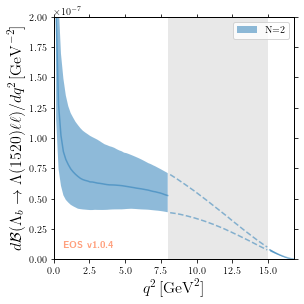

In [22]:
plot_args = {
    'plot': {
        'x': { 'label': r'$q^2$', 'unit': r'$\textnormal{GeV}^2$',  'range': [0, 16.81] },
        'y': { 'label': r'$d\mathcal{B}(\Lambda_b\to\Lambda(1520)\ell\ell)/dq^2$', 'unit': r'$\textnormal{GeV}^{-2}$', 'range': [0., 2e-7] },
        'legend': { 'location': 'upper right' },
        'size': (11, 11)
    },
    'contents': [
        {
            'label': r'N=2',
            'type': 'uncertainty',
            'color': "C0",
            'range': [0, 8.],
            'band': ['median', 'area'],
            'data': { 'samples': observable_samples[:,0::3],
                      'weights': weights[indices], 'xvalues': q2values }
        },
        {
            'label': None,
            'type': 'uncertainty',
            'color': "C0",
            'range': [8, 15],
            'style': 'dashed',
            'band': ['outer'],
            'data': { 'samples': observable_samples[:,0::3],
                      'weights': weights[indices], 'xvalues': q2values }
        },
        {
            'label': None,
            'type': 'uncertainty',
            'color': "C0",
            'range': [15, 16.81],
            'band': ['median', 'area'],
            'data': { 'samples': observable_samples[:,0::3],
                      'weights': weights[indices], 'xvalues': q2values }
        },
        {
            'type': 'band',
            'color': 'lightgray',
            'x': (8, 15)
        },
        {
            'type': 'watermark',
            'position': ['left', 'bottom']
        },
    ]}
eos.plot.Plotter(plot_args, "LbToLll_BR.pdf").plot()

(<Figure size 311.811x311.811 with 1 Axes>,
 <AxesSubplot:xlabel='$q^2$\\,[$\\textnormal{GeV}^2$]', ylabel='$A_\\mathrm{FB}^\\ell(\\Lambda_b\\to\\Lambda(1520)\\ell\\ell)$'>)

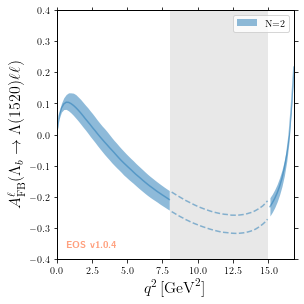

In [23]:
plot_args = {
    'plot': {
        'x': { 'label': r'$q^2$', 'unit': r'$\textnormal{GeV}^2$',  'range': [0, 16.81] },
        'y': { 'label': r'$A_\mathrm{FB}^\ell(\Lambda_b\to\Lambda(1520)\ell\ell)$', 'range': [-.4, .4] },
        'legend': { 'location': 'upper right' },
        'size': (11, 11)
    },
    'contents': [
        {
            'label': r'N=2',
            'type': 'uncertainty',
            'color': "C0",
            'range': [0, 8.],
            'band': ['median', 'area'],
            'data': { 'samples': observable_samples[:,1::3],
                      'weights': weights[indices], 'xvalues': q2values }
        },
        {
            'label': None,
            'type': 'uncertainty',
            'color': "C0",
            'range': [8, 15],
            'style': 'dashed',
            'band': ['outer'],
            'data': { 'samples': observable_samples[:,1::3],
                      'weights': weights[indices], 'xvalues': q2values }
        },
        {
            'label': None,
            'type': 'uncertainty',
            'color': "C0",
            'range': [15, 16.81],
            'band': ['median', 'area'],
            'data': { 'samples': observable_samples[:,1::3],
                      'weights': weights[indices], 'xvalues': q2values }
        },
        {
            'type': 'band',
            'color': 'lightgray',
            'x': (8, 15)
        },
        {
            'type': 'watermark',
            'position': ['left', 'bottom']
        },
    ]}
eos.plot.Plotter(plot_args, "LbToLll_AFB.pdf").plot()

(<Figure size 311.811x311.811 with 1 Axes>,
 <AxesSubplot:xlabel='$q^2$\\,[$\\textnormal{GeV}^2$]', ylabel='$S_{1cc}(\\Lambda_b\\to\\Lambda(1520)\\ell\\ell)$'>)

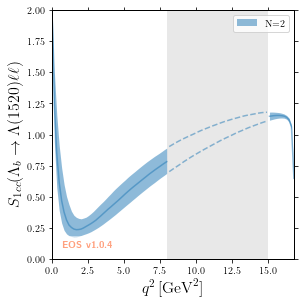

In [24]:
plot_args = {
    'plot': {
        'x': { 'label': r'$q^2$', 'unit': r'$\textnormal{GeV}^2$',  'range': [0, 16.81] },
        'y': { 'label': r'$S_{1cc}(\Lambda_b\to\Lambda(1520)\ell\ell)$', 'range': [0, 2] },
        'legend': { 'location': 'upper right' },
        'size': (11, 11)
    },
    'contents': [
        {
            'label': r'N=2',
            'type': 'uncertainty',
            'color': "C0",
            'range': [0, 8.],
            'band': ['median', 'area'],
            'data': { 'samples': observable_samples[:,2::3],
                      'weights': weights[indices], 'xvalues': q2values }
        },
        {
            'label': None,
            'type': 'uncertainty',
            'color': "C0",
            'range': [8, 15],
            'style': 'dashed',
            'band': ['outer'],
            'data': { 'samples': observable_samples[:,2::3],
                      'weights': weights[indices], 'xvalues': q2values }
        },
        {
            'label': None,
            'type': 'uncertainty',
            'color': "C0",
            'range': [15, 16.81],
            'band': ['median', 'area'],
            'data': { 'samples': observable_samples[:,2::3],
                      'weights': weights[indices], 'xvalues': q2values }
        },
        {
            'type': 'band',
            'color': 'lightgray',
            'x': (8, 15)
        },
        {
            'type': 'watermark',
            'position': ['left', 'bottom']
        },
    ]}
eos.plot.Plotter(plot_args, "LbToLll_S1cc.pdf").plot()